# Weather in Australia. Will it rain tomorrow?
## Introduction to the project 


### Context 

In this case, the project involves analyzing the "**Weather in AUS**" dataset from Kaggle, which contains information about various weather conditions across different cities in Australia. 

**Context of the project's integration into the business:** From a business perspective, weather data analysis is crucial for a wide range of industries, such as agriculture, transportation, energy, and tourism. By leveraging this dataset, we can gain valuable insights into weather patterns and trends, enabling organizations to make informed decisions that can optimize their operations, mitigate risks, and enhance their overall profitability. 

**From a technical point of view:** Technically, this project presents an exciting opportunity to showcase our data science skills. We will explore various techniques for data cleaning, preprocessing, exploratory analysis, and predictive modeling. The dataset contains a rich set of variables, including date, location, temperature, rainfall, wind speed, humidity, pressure, and cloud coverage. By applying advanced statistical and machine learning methods, we can uncover intricate relationships and patterns hidden within the data, leading to accurate weather forecasting models. 

**From an economic point of view:** Weather conditions have a significant impact on economic activities across various sectors. Accurate weather predictions can help businesses plan their operations more efficiently, reducing costs and improving profitability. For example, the agriculture industry can optimize crop yields by understanding weather patterns and making informed decisions about planting, harvesting, and irrigation. Similarly, energy companies can better manage their supply and demand based on weather forecasts, ensuring reliable and cost-effective energy distribution. 

**From a scientific point of view:** Scientifically, this project provides an excellent opportunity to contribute to the field of meteorology and climate science. By analyzing the Australian weather data, we can validate existing models, identify potential improvements, and even develop new theories or techniques for weather prediction. Our findings could help advance our understanding of atmospheric processes, climate change patterns, and other phenomena related to weather and climate. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
import shap
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier

ModuleNotFoundError: No module named 'shap'

In [1]:

df = pd.read_csv("/data/weatherAUS.csv")

NameError: name 'pd' is not defined

## Exploration of the data

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

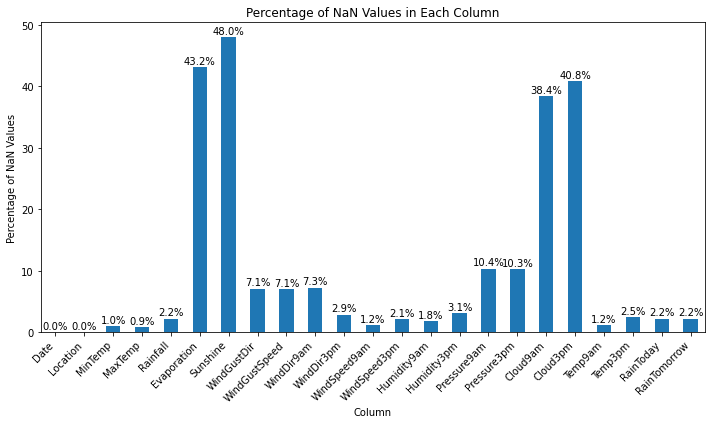

In [85]:
# DataFrame is 'df'
# Calculate the percentage of NaN values in each column
nan_percentages = df.isna().mean() * 100
 
# Create a bar plot
fig, ax = plt.subplots(figsize=(10, 6))
nan_percentages.plot(kind='bar', ax=ax)
 
# Set the plot title and labels
ax.set_title('Percentage of NaN Values in Each Column')
ax.set_xlabel('Column')
ax.set_ylabel('Percentage of NaN Values')
 
# Add percentage labels on top of each bar
for i, percentage in enumerate(nan_percentages):
    ax.text(i, percentage + 0.5, f'{percentage:.1f}%', ha='center')
 
# Rotate the x-axis labels if needed
plt.xticks(rotation=45, ha='right')
 
# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

The dataset has 23 variables, 6 of which are categorical. The first column is the date, and we will later change it to datetime.

4 variables present a missing value rate close to 40%: Evaporation, Sunshine, Cloud9am and Cloud3pm.




In [86]:
# Print the first 5 rows, corresponding to 5 days from december 2008
df.head().T

,0,1,2,3,4
Date,2008-12-01,2008-12-02,2008-12-03,2008-12-04,2008-12-05
Location,Albury,Albury,Albury,Albury,Albury
MinTemp,13.4,7.4,12.9,9.2,17.5
MaxTemp,22.9,25.1,25.7,28.0,32.3
Rainfall,0.6,0.0,0.0,0.0,1.0
Evaporation,NaN,NaN,NaN,NaN,NaN
Sunshine,NaN,NaN,NaN,NaN,NaN
WindGustDir,W,WNW,WSW,NE,W
WindGustSpeed,44.0,44.0,46.0,24.0,41.0
WindDir9am,W,NNW,W,SE,ENE


In [87]:
#sns.pairplot(df)

### Manipulation of variables

In [88]:
df['Date'] = pd.to_datetime(df['Date'])

In [89]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day


   # Create a new variable 'RainYesterday' that represents the 'RainToday' value of the previous day
df['RainYesterday'] = df.groupby('Location')['RainToday'].shift(1)
 
# Create a new variable 'RainTomorrow_Tested' that represents the 'RainToday' value of the next day
df['RainTomorrow_Tested'] = df.groupby('Location')['RainToday'].shift(-1)
 
# Verify the accuracy of the "will it rain tomorrow" prediction for each city
for city in df['Location'].unique():
    city_data = df[df['Location'] == city]
    # Get unique dates in ascending order
    unique_dates = city_data['Date'].unique()
    unique_dates.sort()
    # Variables to count correct and incorrect predictions
    correct_predictions = 0
    incorrect_predictions = 0
    # Iterate over unique dates (excluding the last date)
    for i in range(len(unique_dates) - 1):
        today = unique_dates[i]
        tomorrow = unique_dates[i + 1]
        # Check if tomorrow's date is consecutive to today's date
        if (tomorrow - today).astype('timedelta64[D]') == 1:
            today_data = city_data[city_data['Date'] == today]
            # Get the rain prediction for tomorrow (from today's data)
            predicted_rain_tomorrow = today_data['RainTomorrow'].values[0]
            # Get the actual rain information for tomorrow (from the 'RainTomorrow_Tested' column)
            actual_rain_tomorrow = today_data['RainTomorrow_Tested'].values[0]
            # Compare the prediction with the actual information
            if predicted_rain_tomorrow == actual_rain_tomorrow:
                correct_predictions += 1
            else:
                incorrect_predictions += 1
    # Calculate the percentage of correct predictions
    total_predictions = correct_predictions + incorrect_predictions
    accuracy = (correct_predictions / total_predictions) * 100 if total_predictions > 0 else 0
    #print(f"City: {city}")
    #print(f"Correct predictions: {correct_predictions}")
    #print(f"Incorrect predictions: {incorrect_predictions}")
    #print(f"Accuracy percentage: {accuracy:.2f}%")
    #print("---")

In [90]:
#df[['Date','Location','RainTomorrow','RainTomorrow_Tested','RainToday']].head(30)

In [91]:
df.drop(['Date'], axis=1, inplace=True)
#df.drop(['RainTomorrow_Tested'], axis=1, inplace=True)

In [92]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


In [93]:
# We are going to replace from objet to boolean the  target variable RainTomorrow and the variable RainToday

df['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
df['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)

In [94]:
## we drop NAN
df = df[(df['RainTomorrow'] == 0) | (df['RainTomorrow'] == 1)]
df = df[(df['RainToday'] == 0) | (df['RainToday'] == 1)]

In [95]:
df['RainTomorrow'].value_counts() / len(df)

0.0    0.778382
1.0    0.221618
Name: RainTomorrow, dtype: float64

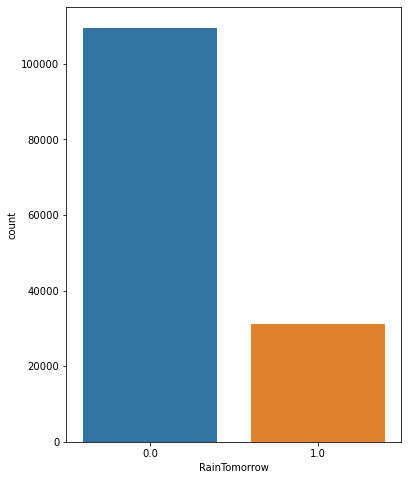

In [96]:
## in this graph, we see that our dataframe is unbalanced
f, ax = plt.subplots(figsize=(6, 8))
ax = sns.countplot(x="RainTomorrow", data=df)
plt.show()

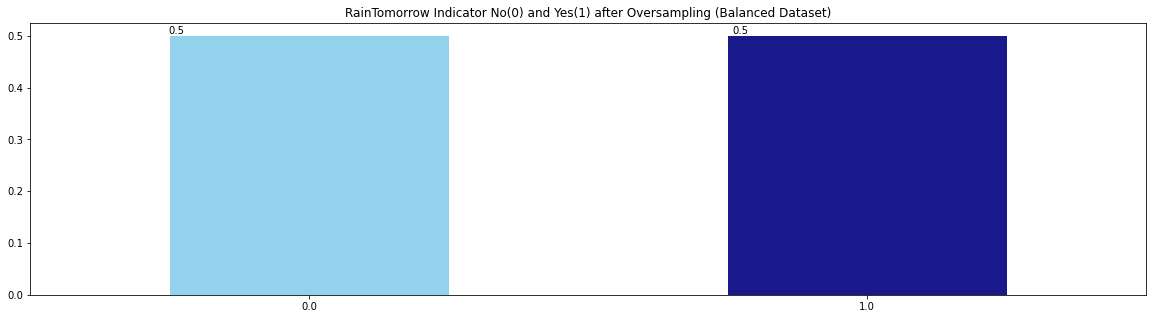

In [97]:
from sklearn.utils import resample
 
no = df[df.RainTomorrow == 0]
yes = df[df.RainTomorrow == 1]
yes_oversampled = resample(yes, replace=True, n_samples=len(no), random_state=42)
df = pd.concat([no, yes_oversampled])
 
fig = plt.figure(figsize = (20,5))
ax=df.RainTomorrow.value_counts(normalize = True).plot(kind='bar', color= ['skyblue','navy'], alpha = 0.9, rot=0)
plt.title('RainTomorrow Indicator No(0) and Yes(1) after Oversampling (Balanced Dataset)')
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.show()

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219172 entries, 0 to 141882
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       219172 non-null  object 
 1   MinTemp        218440 non-null  float64
 2   MaxTemp        218725 non-null  float64
 3   Rainfall       219172 non-null  float64
 4   Evaporation    125693 non-null  float64
 5   Sunshine       115801 non-null  float64
 6   WindGustDir    203995 non-null  object 
 7   WindGustSpeed  204119 non-null  float64
 8   WindDir9am     204976 non-null  object 
 9   WindDir3pm     212953 non-null  object 
 10  WindSpeed9am   217540 non-null  float64
 11  WindSpeed3pm   215027 non-null  float64
 12  Humidity9am    216547 non-null  float64
 13  Humidity3pm    213316 non-null  float64
 14  Pressure9am    197878 non-null  float64
 15  Pressure3pm    197756 non-null  float64
 16  Cloud9am       139233 non-null  float64
 17  Cloud3pm       134902 non-nul

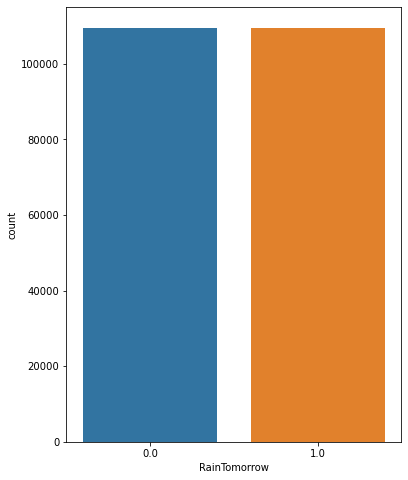

In [99]:
f, ax = plt.subplots(figsize=(6, 8))
ax = sns.countplot(x="RainTomorrow", data=df)
plt.show()

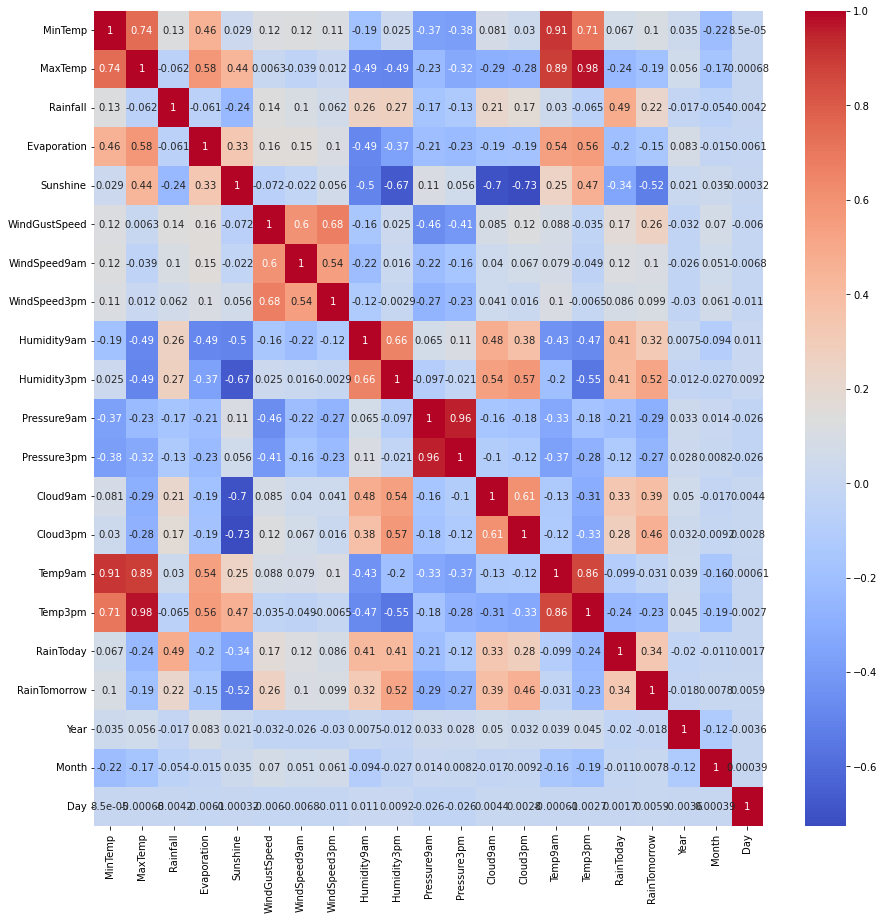

In [100]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize= (15,15))

sns.heatmap(corr_matrix, annot=True, ax = ax, cmap = 'coolwarm')
plt.show()

In [101]:
df.describe(include = object).T

,count,unique,top,freq
Location,219172,49,Portland,5724
WindGustDir,203995,16,W,16211
WindDir9am,204976,16,N,19920
WindDir3pm,212953,16,W,16124


#### Filling Missing Values

In [102]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,0.0,0.0,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,0.0,0.0,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,0.0,0.0,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,0.0,0.0,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,0.0,0.0,2008,12,5


from sklearn.impute import KNNImputer
 
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns
data_numeric = df[numerical_features]
 
imputer = KNNImputer(n_neighbors=5)  #
 
data_imputed = imputer.fit_transform(data_numeric)
 
data_imputed_df = pd.DataFrame(data_imputed, columns=numerical_features)
 
non_numerical_features = df.columns.difference(numerical_features)
df = pd.concat([data_imputed_df, df[non_numerical_features]], axis=1)

In [103]:
## remplaced by the knnimputer

numerical_vars = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_vars] = df[numerical_vars].fillna(df[numerical_vars].mean())

In [104]:
cat_vars = df.select_dtypes(include=['object']).columns
#print(cat_vars)
#df[cat_vars] = df[cat_vars].fillna(df[cat_vars].mode())
df['WindGustDir'] = df['WindGustDir'].fillna(df['WindGustDir'].mode())
df['WindDir9am'] = df['WindDir9am'].fillna(df['WindDir9am'].mode())
df['WindDir9am'] = df['WindDir9am'].fillna(df['WindDir9am'].mode())

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219172 entries, 0 to 141882
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       219172 non-null  object 
 1   MinTemp        219172 non-null  float64
 2   MaxTemp        219172 non-null  float64
 3   Rainfall       219172 non-null  float64
 4   Evaporation    219172 non-null  float64
 5   Sunshine       219172 non-null  float64
 6   WindGustDir    203995 non-null  object 
 7   WindGustSpeed  219172 non-null  float64
 8   WindDir9am     204976 non-null  object 
 9   WindDir3pm     212953 non-null  object 
 10  WindSpeed9am   219172 non-null  float64
 11  WindSpeed3pm   219172 non-null  float64
 12  Humidity9am    219172 non-null  float64
 13  Humidity3pm    219172 non-null  float64
 14  Pressure9am    219172 non-null  float64
 15  Pressure3pm    219172 non-null  float64
 16  Cloud9am       219172 non-null  float64
 17  Cloud3pm       219172 non-nul

In [106]:
##There was some missing values in the following variables that we are not interested in
df['RainTomorrow'].value_counts() / len(df)
df['RainToday'].value_counts() / len(df)

0.0    0.689591
1.0    0.310409
Name: RainToday, dtype: float64

#### IQR Outliers

In [107]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,219172.0,12.547585,6.387768,-8.5,8.0,12.300000,17.200000,33.9
MaxTemp,219172.0,22.469742,7.117652,-4.8,17.2,21.800000,27.500000,48.1
Rainfall,219172.0,3.709474,11.089304,0.0,0.0,0.000000,2.200000,371.0
Evaporation,219172.0,5.138477,3.000616,0.0,3.8,5.138477,5.138477,145.0
Sunshine,219172.0,6.479698,2.867631,0.0,6.4,6.479698,7.200000,14.5
WindGustSpeed,219172.0,42.074496,14.130489,6.0,33.0,41.000000,50.000000,135.0
WindSpeed9am,219172.0,14.518484,9.138351,0.0,7.0,13.000000,20.000000,130.0
WindSpeed3pm,219172.0,19.129007,9.072050,0.0,13.0,19.000000,24.000000,87.0
Humidity9am,219172.0,72.111149,18.486787,0.0,61.0,73.000000,87.000000,100.0
Humidity3pm,219172.0,57.714217,21.551367,0.0,43.0,58.000000,73.000000,100.0


If we compare the mean of each column with the min/max value, we'll notice that Rainfall, Evaporation, WindSpeed9am and WindSpeed3pm might have outliers as there's a considerable difference between average value and max value.

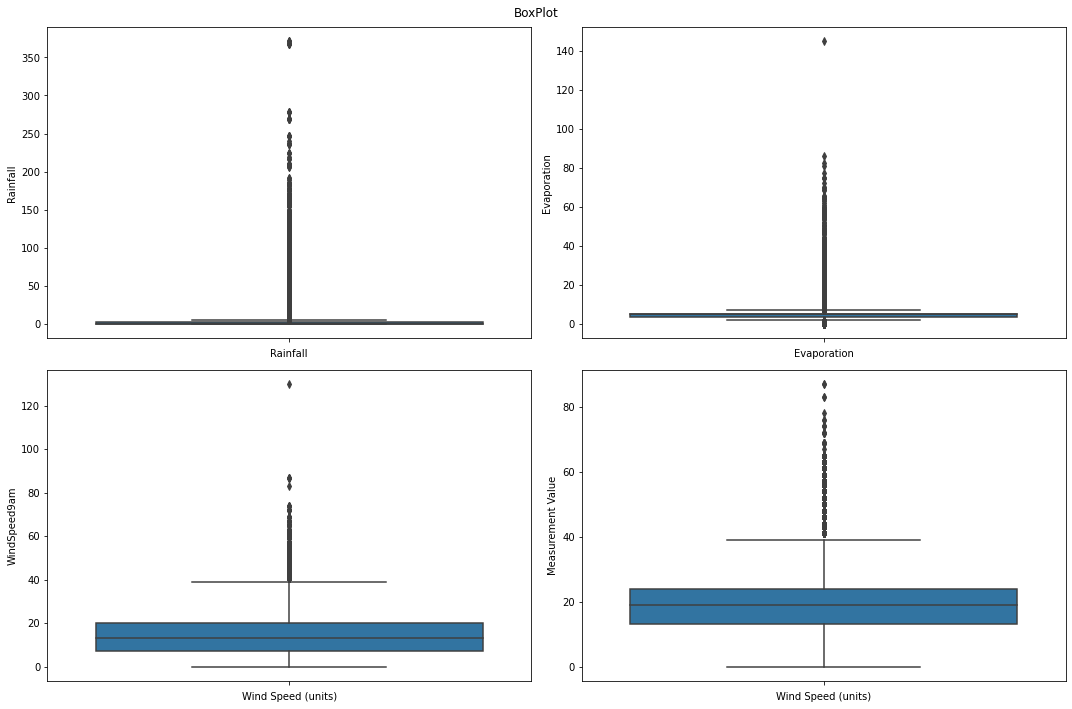

In [108]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
ax = sns.boxplot(y=df["Rainfall"])
ax.set_xlabel("Rainfall") 

plt.subplot(2, 2, 2)
ax = sns.boxplot(y=df["Evaporation"])
ax.set_xlabel("Evaporation")  

plt.subplot(2, 2, 3)
ax = sns.boxplot(y=df["WindSpeed9am"])
ax.set_xlabel("Wind Speed (units)")  

plt.subplot(2, 2, 4)
ax = sns.boxplot(y=df["WindSpeed3pm"])
ax.set_xlabel("Wind Speed (units)")  

plt.ylabel("Measurement Value") 
plt.suptitle("BoxPlot")
plt.xticks(rotation=45) 
plt.tight_layout() 
plt.show() 

In [109]:
fill_iqr = lambda col, iqr: col.apply(lambda x: iqr if x > iqr else x)

In [110]:
# IQR (Inter Quartile Range) 
Q1 = df["Rainfall"].quantile(0.25)
Q3 = df["Rainfall"].quantile(0.75)
IQR = Q3 - Q1
print(IQR)
Up_Limit = Q3 + (2.5 * IQR)
print(Up_Limit)


2.2
7.7


In [111]:
df["Rainfall"] = fill_iqr(df["Rainfall"], Up_Limit)

In [112]:
# IQR (Inter Quartile Range) 
Q1 = df["Evaporation"].quantile(0.25)
Q3 = df["Evaporation"].quantile(0.75)
IQR = Q3 - Q1
print(IQR)
Up_Limit = Q3 + (2.5 * IQR)
print(Up_Limit)

1.3384770830515818
8.484669790680536


In [113]:
df["Evaporation"] = fill_iqr(df["Evaporation"], Up_Limit)

In [114]:
# IQR (Inter Quartile Range) 
Q1 = df["WindSpeed9am"].quantile(0.25)
Q3 = df["WindSpeed9am"].quantile(0.75)
IQR = Q3 - Q1
print(IQR)
Up_Limit = Q3 + (2.5 * IQR)
print(Up_Limit)

13.0
52.5


In [115]:
df["WindSpeed9am"] = fill_iqr(df["WindSpeed9am"], Up_Limit)

In [116]:
# IQR (Inter Quartile Range) 
Q1 = df["WindSpeed3pm"].quantile(0.25)
Q3 = df["WindSpeed3pm"].quantile(0.75)
IQR = Q3 - Q1
print(IQR)
Up_Limit = Q3 + (2.5 * IQR)
print(Up_Limit)

11.0
51.5


In [117]:
df["WindSpeed3pm"] = fill_iqr(df["WindSpeed3pm"], Up_Limit)

#### Separate and encode

In [118]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
X = df.drop("RainTomorrow",axis=1)
y = df["RainTomorrow"]


In [119]:

cat_vars = X.select_dtypes(include=['object']).columns
X[cat_vars] = X[cat_vars].apply(label_encoder.fit_transform)

In [120]:
X.head().T

,0,1,2,3,4
Location,2.000000,2.000000,2.000000,2.000000,2.000000
MinTemp,13.400000,7.400000,12.900000,9.200000,17.500000
MaxTemp,22.900000,25.100000,25.700000,28.000000,32.300000
Rainfall,0.600000,0.000000,0.000000,0.000000,1.000000
Evaporation,5.138477,5.138477,5.138477,5.138477,5.138477
Sunshine,6.479698,6.479698,6.479698,6.479698,6.479698
WindGustDir,13.000000,14.000000,15.000000,4.000000,13.000000
WindGustSpeed,44.000000,44.000000,46.000000,24.000000,41.000000
WindDir9am,13.000000,6.000000,13.000000,9.000000,1.000000
WindDir3pm,14.000000,15.000000,15.000000,0.000000,7.000000


In [121]:
y.head()
y.info()

<class 'pandas.core.series.Series'>
Int64Index: 219172 entries, 0 to 141882
Series name: RainTomorrow
Non-Null Count   Dtype  
--------------   -----  
219172 non-null  float64
dtypes: float64(1)
memory usage: 3.3 MB


In [122]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 42)

In [123]:
y_test.info()

<class 'pandas.core.series.Series'>
Int64Index: 65752 entries, 10377 to 87129
Series name: RainTomorrow
Non-Null Count  Dtype  
--------------  -----  
65752 non-null  float64
dtypes: float64(1)
memory usage: 1.0 MB


#### SCALING DATA

In [124]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)

### MODEL Logistic Regression

In [45]:
#y_train = y_train.replace({0: 'No', 1: 'Yes'})
#y_test = y_test.replace({0: 'No', 1: 'Yes'})

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)


parameters = [{'penalty':['l1','l2']}, 
              {'C':[0.001, 0.01, 0.1, 1, 10, 100]}]
logreg = LogisticRegression(solver = 'liblinear')
grid_search_logreg = GridSearchCV(estimator = logreg,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)

grid_search_logreg.fit(X_train_scaled, y_train)

print('Best hyperparameters are: '+str(grid_search_logreg.best_params_))
print('Best score is: '+str(grid_search_logreg.best_score_))

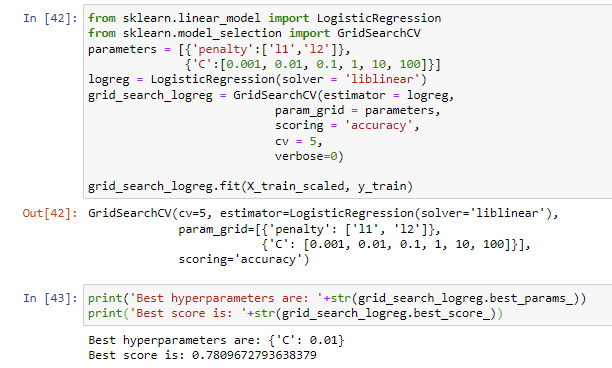

In [48]:
logreg1 = LogisticRegression(solver = 'liblinear',  C=0.01)
logreg1.fit(X_train_scaled, y_train)

LogisticRegression(C=0.01, solver='liblinear')

In [49]:
y_pred = logreg1.predict(X_test_scaled)
logreg1.score(X_test_scaled, y_test)

0.7830940503710914

In [50]:
f1 = f1_score(y_test, y_pred, average='weighted')
print(f1)

0.7830576865877716


In [51]:
roc_auc = roc_auc_score(y_test, y_pred)
print(roc_auc)

0.7831221261259085


In [52]:
print(y_pred)

[0. 0. 0. ... 0. 0. 0.]


In [53]:

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[26138  6670]
 [ 7592 25352]]


<AxesSubplot:>

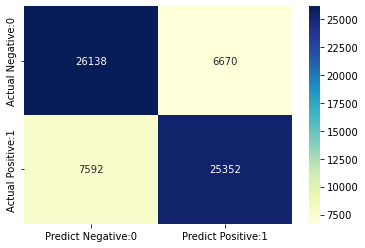

In [54]:
cm_matrix = pd.DataFrame(data=cm, index=['Actual Negative:0','Actual Positive:1'], 
                                 columns=['Predict Negative:0','Predict Positive:1'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

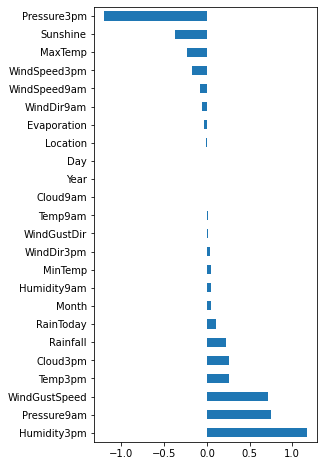

In [55]:
pd.Series(logreg1.coef_[0], X_train.columns).sort_values(
    ascending=False).plot(kind='barh', figsize=(4,8));

In [59]:
explainer = shap.Explainer(logreg1, X_train)
shap_values = explainer(X_test)

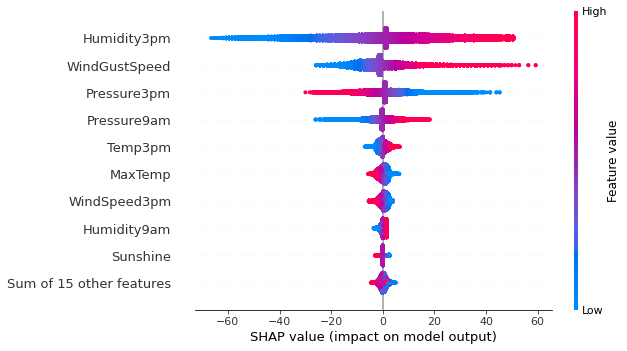

In [60]:
shap.plots.beeswarm(shap_values)

### MODEL RF

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train_scaled, y_train)


param_grid = {
    'max_depth':[3,5,10,None],
    'n_estimators':[10,100,200],
    'max_features':['sqrt', 'log2', None],
    'min_samples_leaf':[1,2,3],
    'min_samples_split':[1,2,3]
}
rf = RandomForestClassifier()
grid_search_rf = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search_rf.fit(X_train_scaled, y_train)

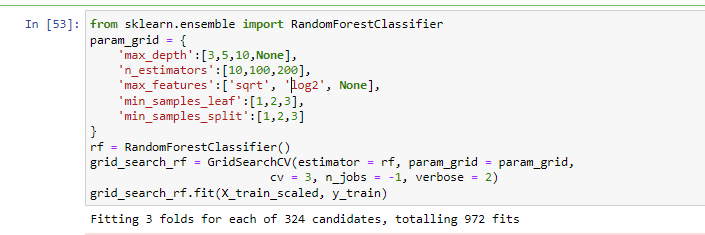

print('Best hyperparameters are: '+str(grid_search_rf.best_params_))
print('Best score is: '+str(grid_search_rf.best_score_))

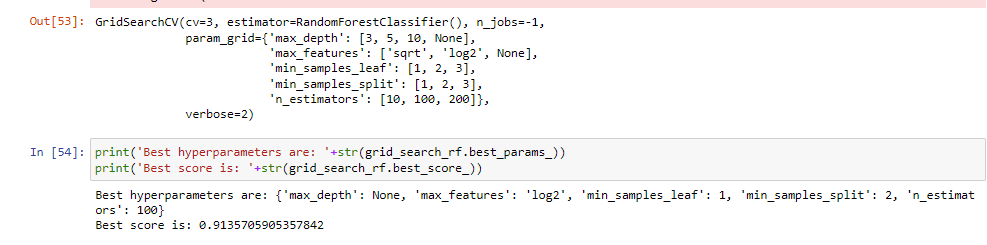

In [125]:
rf1 = RandomForestClassifier(max_depth=None,max_features='log2',min_samples_leaf=1,min_samples_split=2,n_estimators=100)
rf1.fit(X_train_scaled, y_train)

RandomForestClassifier(max_features='log2')

In [126]:
y_pred_rf = rf1.predict(X_test_scaled)
rf1.score(X_test_scaled, y_test)

0.9435150261589001

In [127]:
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')
print(f1_rf)

0.9434757733176986


In [128]:
roc_auc_rf = roc_auc_score(y_test, y_pred_rf)
print(roc_auc_rf)

0.9434623764753003


In [129]:
print(y_pred_rf)

[0. 0. 0. ... 1. 0. 0.]


In [130]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
print(cm_rf)

[[30118  2690]
 [ 1024 31920]]


<AxesSubplot:>

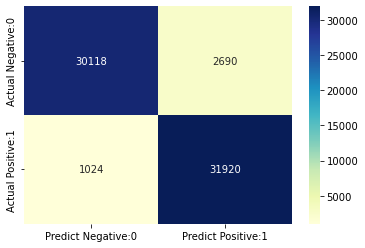

In [131]:
cm_matrix_rf = pd.DataFrame(data=cm_rf, index=['Actual Negative:0','Actual Positive:1'], 
                                 columns=['Predict Negative:0','Predict Positive:1'])

sns.heatmap(cm_matrix_rf, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
#from sklearn import tree


#plt.figure(figsize=(50, 20))

#_ = tree.plot_tree(rf.estimators_[0], rounded=True, # Rounded node edges
 #                  feature_names= df.columns, 
  #                 filled=True, # Adds color according to class
  #                 proportion=True)

In [132]:
# Obtener la importancia de las variables
importances = rf1.feature_importances_
 
# Obtener los nombres de las variables
feature_names = df.columns
 
# Crear una lista de tuplas (nombre_variable, importancia)
feature_importances = list(zip(feature_names, importances))
 
# Ordenar las variables por importancia descendente
feature_importances.sort(key=lambda x: x[1], reverse=True)
 
# Imprimir las variables y su importancia
for feature, importance in feature_importances:
    print(f"{feature}: {importance}")

Humidity3pm: 0.16035748606569405
Sunshine: 0.062408119419095825
Pressure3pm: 0.05965821963823485
Pressure9am: 0.05365487766911976
Humidity9am: 0.05228395454666445
WindGustSpeed: 0.051661359429222224
Rainfall: 0.04634835508967027
Temp3pm: 0.04285640146651975
Cloud3pm: 0.04165201698058936
MinTemp: 0.04116981267450635
MaxTemp: 0.03934007121746956
Temp9am: 0.03761375160774005
RainToday: 0.03270428850196241
Month: 0.030665567665561107
WindSpeed3pm: 0.027854347611020097
Location: 0.027662917686387047
WindDir3pm: 0.026902660555747873
WindSpeed9am: 0.025851406818666954
WindDir9am: 0.025612086544773875
WindGustDir: 0.02551014268232783
Year: 0.02291960659412035
Cloud9am: 0.02286996304346476
RainTomorrow: 0.021466756176104426
Evaporation: 0.020975830315336723


In [133]:
explainer = shap.TreeExplainer(rf1, data=X_train[:10])
shap_values = explainer(X_test)

100%|===================| 130985/131504 [00:59<00:00]        

In [134]:
shap.plots.beeswarm(shap_values)

ValueError: The beeswarm plot does not support plotting explanations with instances that have more than one dimension!

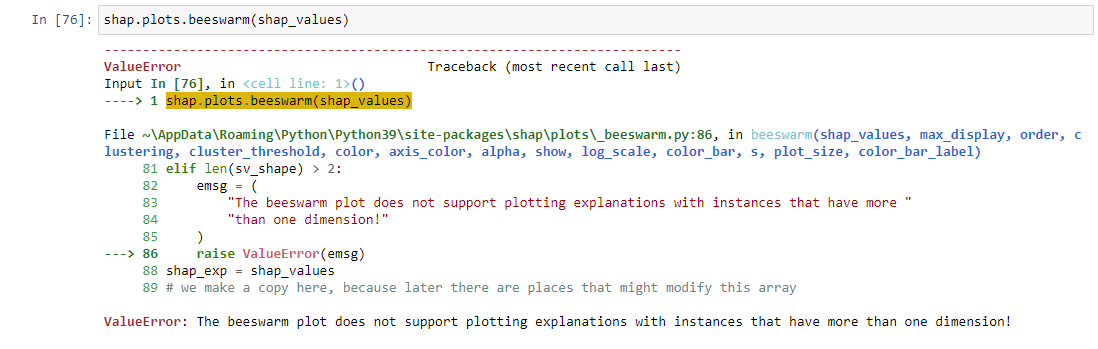

In [ ]:
#!pip install shap

### MODEL DT

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=40)
dt.fit(X_train_scaled, y_train)

param_grid = {'criterion':['gini','entropy'],
              'max_depth':[5,10,15,20,50,100,120,150]
}
dt = DecisionTreeClassifier()
grid_search_dt = GridSearchCV(estimator = dt, param_grid = param_grid, 
                          cv = 3)
grid_search_dt.fit(X_train_scaled, y_train)

print('Best hyperparameters are: '+str(grid_search_dt.best_params_))
print('Best score is: '+str(grid_search_dt.best_score_))

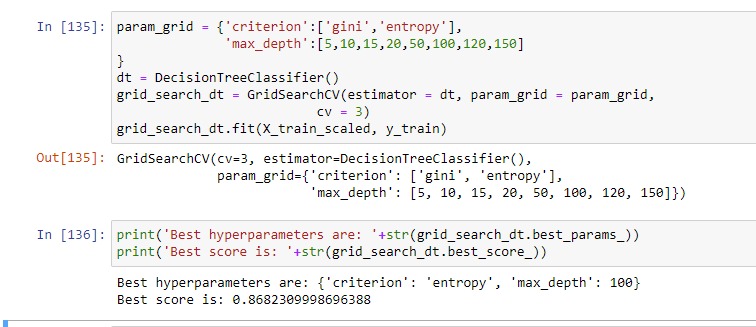

In [137]:

dt2 = DecisionTreeClassifier(criterion= 'entropy',max_depth = 100 )
dt2.fit(X_train_scaled, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=100)

In [138]:
y_pred_dt = dt2.predict(X_test_scaled)
dt2.score(X_test_scaled, y_test)

0.8963833799732328

In [139]:
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')
print(f1_dt)

0.8960748554096741


In [140]:
roc_auc_dt = roc_auc_score(y_test, y_pred_dt)
print(roc_auc_dt)

0.8962723639172099


In [141]:
print(y_pred_dt)

[0. 0. 0. ... 1. 0. 0.]


In [142]:
cm_dt = confusion_matrix(y_test, y_pred_dt)
print(cm_dt)

[[27644  5164]
 [ 1649 31295]]


<AxesSubplot:>

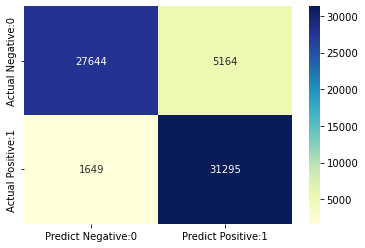

In [143]:
cm_matrix_dt = pd.DataFrame(data=cm_dt, index=['Actual Negative:0','Actual Positive:1'], 
                                 columns=['Predict Negative:0','Predict Positive:1'])

sns.heatmap(cm_matrix_dt, annot=True, fmt='d', cmap='YlGnBu')

#

from sklearn import tree

plt.figure(figsize=(25, 20))
_ = tree.plot_tree(dt, rounded=True, # Rounded node edges
                   feature_names= df.columns, 
                   filled=True, # Adds color according to class
                   proportion=True)
                  

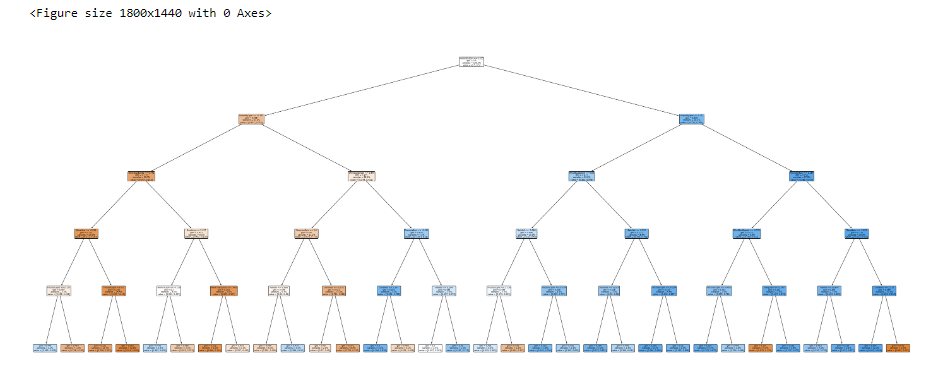

In [145]:
# Obtener la importancia de las variables
importances = dt2.feature_importances_
 
# Obtener los nombres de las variables
feature_names = df.columns
 
# Crear una lista de tuplas (nombre_variable, importancia)
feature_importances = list(zip(feature_names, importances))
 
# Ordenar las variables por importancia descendente
feature_importances.sort(key=lambda x: x[1], reverse=True)
 
# Imprimir las variables y su importancia
for feature, importance in feature_importances:
    print(f"{feature}: {importance}")

Humidity3pm: 0.2476447507909407
Pressure3pm: 0.07857604842571407
WindGustSpeed: 0.06115085768422286
Sunshine: 0.053281107347275675
MinTemp: 0.039128578951364755
Pressure9am: 0.038277584394559375
Humidity9am: 0.03773464289015821
Temp9am: 0.0363223560775126
Month: 0.036003347062558824
MaxTemp: 0.033752683444914146
Temp3pm: 0.03324955792523202
Location: 0.031079774275156815
Rainfall: 0.029706132450224094
WindSpeed3pm: 0.028594536009553886
WindDir3pm: 0.02835712882675729
WindDir9am: 0.026903642118065535
WindGustDir: 0.025929183888981584
Year: 0.025784146257398697
WindSpeed9am: 0.02562958108621482
Evaporation: 0.023143926123397014
RainTomorrow: 0.022210351458106167
Cloud3pm: 0.021309902685360767
Cloud9am: 0.01572029840816793
RainToday: 0.0005098814181622433


In [148]:
explainer = shap.TreeExplainer(
    dt2, data=X_train[:10])
shap_values = explainer.shap_values(X_test)
 
print('Expected Value:', explainer.expected_value)


Expected Value: [1. 0.]


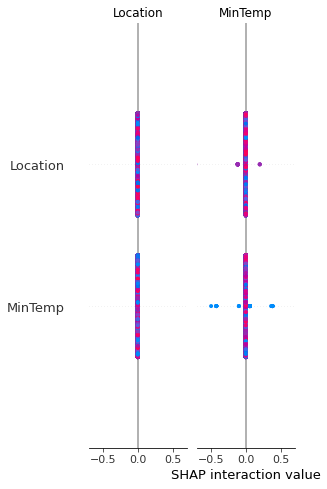

In [149]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

In [ ]:
#!pip install graphviz


### xgboost 2


In [44]:


classifier = XGBClassifier()
classifier.fit(X_train, y_train)



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [45]:
y_pred = classifier.predict(X_test)

In [50]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[27355  5453]
 [ 4835 28109]]


In [49]:

accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 83.94 %
Standard Deviation: 0.49 %


parameters = [{"max_depth": [2,3, 5, 7,10], "n_estimators": [50,100,150, 200, 300, 400, 500, 700]}]
 
#Creating object of GridSearchCV class
grid_search = GridSearchCV(estimator = classifier, param_grid = parameters,scoring = "accuracy", cv = 10, n_jobs = -1)
#Fitting the Grid Search to the training set
grid_search = grid_search.fit(X_train, y_train)

best_accuracy =grid_search.best_score_
 

best_parameters = grid_search.best_params_
 
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

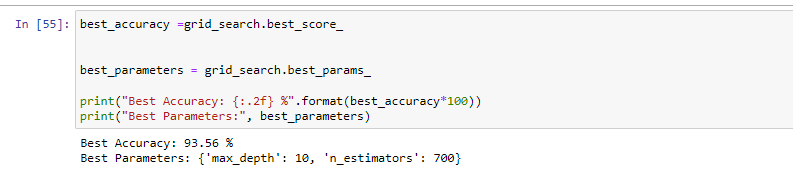

In [152]:
xgb2 = XGBClassifier(max_depth = 10, n_estimators=700)
xgb2.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=700, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [153]:
y_pred = xgb2.predict(X_test)

In [154]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[30058  2750]
 [  899 32045]]


<AxesSubplot:>

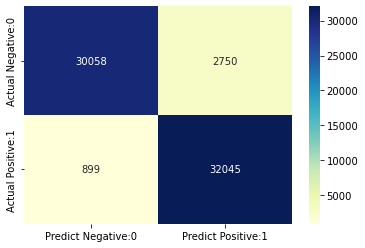

In [155]:
cm_matrix_xgb = pd.DataFrame(data=cm, index=['Actual Negative:0','Actual Positive:1'], 
                                 columns=['Predict Negative:0','Predict Positive:1'])

sns.heatmap(cm_matrix_xgb, annot=True, fmt='d', cmap='YlGnBu')

In [156]:
accuracies = cross_val_score(estimator = xgb2, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 93.56 %
Standard Deviation: 0.30 %


In [157]:
f1_xgb = f1_score(y_test, y_pred, average='weighted')
print(f1_xgb)

0.9444563342151424


In [158]:
roc_auc_xgb = roc_auc_score(y_test, y_pred)
print(roc_auc_xgb)

0.9444451241710199


In [159]:
explainer = shap.TreeExplainer(
    xgb2, data=X_train[:10], model_output="probability")
shap_values = explainer.shap_values(X_test)
 
print('Expected Value:', explainer.expected_value)
 
pd.DataFrame(shap_values).head()

100%|===================| 65727/65752 [17:39<00:00]        

Expected Value: 0.4008666699389113


,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.001228,-0.036404,-0.027880,0.001897,-0.005609,-0.086858,-0.000363,-0.054887,0.013219,-0.017342,...,0.009004,-0.008154,-0.000001,-0.028582,0.001410,-0.008578,0.0,-0.003919,-0.009395,-0.002301
1,-0.053478,-0.051392,0.034802,-0.024631,-0.019173,0.006221,-0.010884,0.027535,0.008391,-0.022978,...,-0.072277,-0.004024,0.024425,0.000248,-0.018445,0.009022,0.0,-0.019163,-0.016832,0.039226
2,-0.006760,-0.023639,-0.005240,0.013155,0.004708,-0.067452,-0.002033,-0.034272,-0.008640,-0.005884,...,-0.018431,0.015982,-0.016278,-0.036610,-0.004930,-0.000095,0.0,-0.013203,-0.014627,-0.002366
3,-0.010582,0.019369,0.075501,0.000780,0.011056,0.002963,-0.002208,0.034607,0.007280,-0.007836,...,-0.052736,0.145141,0.000309,0.001929,-0.004670,0.048538,0.0,-0.001245,0.004899,0.005487
4,-0.062765,0.002579,-0.049175,-0.013844,0.008565,-0.006506,-0.005438,-0.078375,-0.013948,-0.001394,...,-0.074804,0.097709,0.020563,-0.014497,0.007275,0.009778,0.0,0.002685,-0.047540,-0.024354


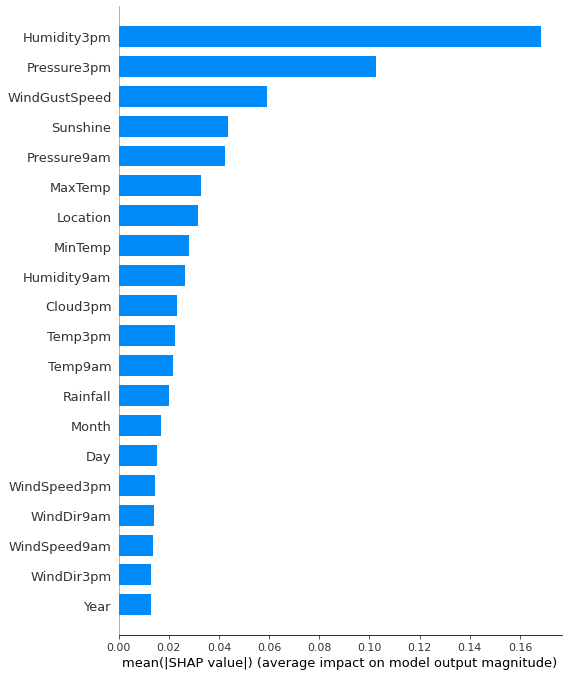

In [160]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

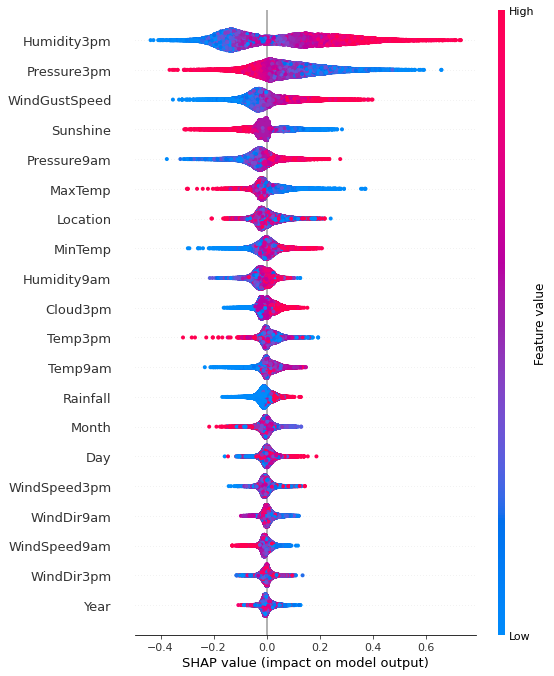

In [161]:
shap.summary_plot(shap_values,X_test)

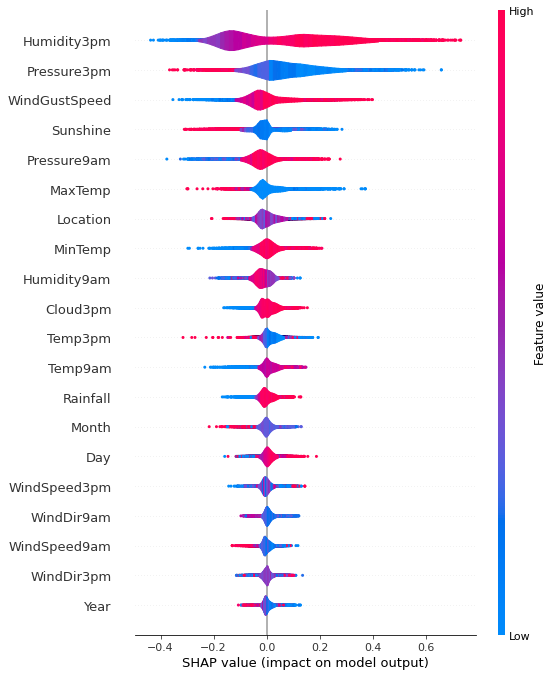

In [162]:
shap.summary_plot(shap_values,X_test, plot_type="violin")